In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn import ensemble, model_selection, metrics, datasets, tree 

import numpy as np
import pandas as pd

загружаем данные из datasets с помощью load_digits()

In [3]:
data = datasets.load_digits()

In [4]:
X = data['data'] #матрица признаков
y = data['target']  #ответы

In [16]:
d =X.shape[1]
d_squared = np.sqrt(d)

In [5]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                                                                    test_size = 0.3,
                                                                    random_state = 0)

In [6]:
clf = tree.DecisionTreeClassifier(random_state=0)
ans_1 = model_selection.cross_val_score(clf, X, y, cv =10).mean()
with open("bagging_1.txt", "w") as fout:
    fout.write(str(ans_1))

In [8]:
bclf = ensemble.BaggingClassifier(n_estimators=100, random_state = 0)
ans_2 = model_selection.cross_val_score(bclf, X, y, cv =10).mean()
with open("bagging_2.txt", "w") as fout:
    fout.write(str(ans_2))

In [9]:
ans_2

0.9253786468032278

In [18]:
bclf_new = ensemble.BaggingClassifier(n_estimators=100, max_features = int(d_squared), random_state = 0)
ans_3 = model_selection.cross_val_score(bclf_new, X, y, cv =10).mean()
with open("bagging_3.txt", "w") as fout:
    fout.write(str(ans_3))

In [26]:
clf_n = tree.DecisionTreeClassifier(max_features = 'sqrt', random_state=0)
bclf_n = ensemble.BaggingClassifier(clf_n, n_estimators=100, random_state = 0)
ans_4 = model_selection.cross_val_score(bclf_n, X, y, cv =10).mean()
with open("bagging_4.txt", "w") as fout:
    fout.write(str(ans_4))
print(ans_4)

0.9510211049037863


In [43]:
means = []
std = []
for n in [1,5,10,20,50,100]:
    rfcl = ensemble.RandomForestClassifier(n_estimators=n, random_state = 0)
    means.append(model_selection.cross_val_score(rfcl, X, y, cv =10).mean())
    std.append(model_selection.cross_val_score(rfcl, X, y, cv =10).std())

In [44]:
means_feat = []
std_feat = []
for n in [5,10,40,50]:
    rfcl = ensemble.RandomForestClassifier(max_features = n, random_state = 0)
    means_feat.append(model_selection.cross_val_score(rfcl, X, y, cv =10).mean())
    std_feat.append(model_selection.cross_val_score(rfcl, X, y, cv =10).std())

In [45]:
means_dep = []
std_dep = []
for n in [2,5, 10,50]:
    rfcl = ensemble.RandomForestClassifier(max_depth = n, random_state = 0)
    means_dep.append(model_selection.cross_val_score(rfcl, X, y, cv =10).mean())
    std_dep.append(model_selection.cross_val_score(rfcl, X, y, cv =10).std())

In [41]:
with open("bagging_5.txt", "w") as fout:
    fout.write('2 3 5 6')

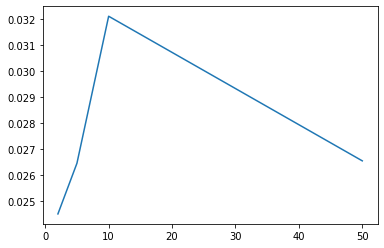

In [64]:
n = [2,5,10,50]
#plt.plot(n, means_dep)
plt.plot(n, std_feat)